In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from scipy.spatial.distance import pdist, squareform


In [47]:
df = pd.read_csv("C:/Users/User/Downloads/model_dataset (1).csv", low_memory=False)

In [48]:
features = ['v2x_api', 'v2x_libdem', 'v2juhccomp', 'v2xcl_rol', 'e_polity2', 'v2caassemb',
            'v2x_frassoc_thick', 'v2casurv', 'v2elembaut', 'v2x_egaldem', 'v2cainsaut',
            'v2x_rule', 'v2clpolcl', 'v2x_gencl', 'v2mebias']


In [49]:
df[features] = df[features].apply(pd.to_numeric, errors='coerce')

In [50]:
df = df.dropna(subset=features)

In [51]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

In [52]:
# PCA for dimensionality reduction and visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
df = df.assign(pca_1=pca_result[:, 0], pca_2=pca_result[:, 1])

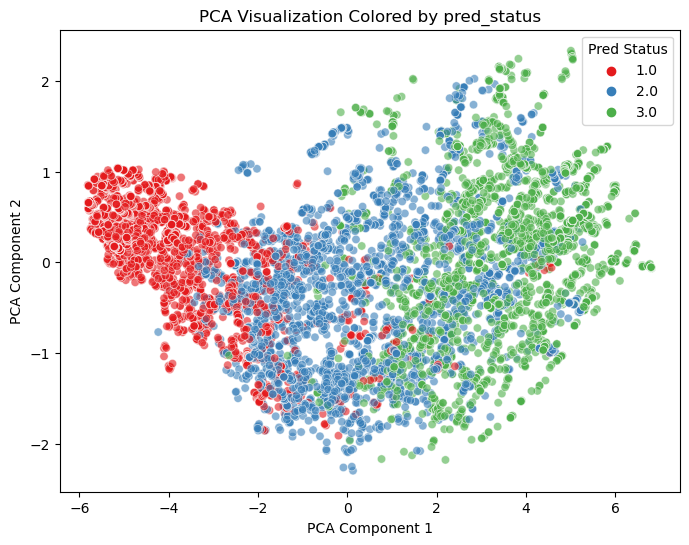

In [98]:
# Plot PCA visualization before clustering, colored by pred_status
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['pca_1'], y=df['pca_2'], hue=df['pred_status'], palette='Set1', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization Colored by pred_status')
plt.legend(title='Pred Status')
plt.show()

In [53]:
# Elbow method to determine optimal clusters
inertia = []
sil_scores = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(df_scaled, labels))


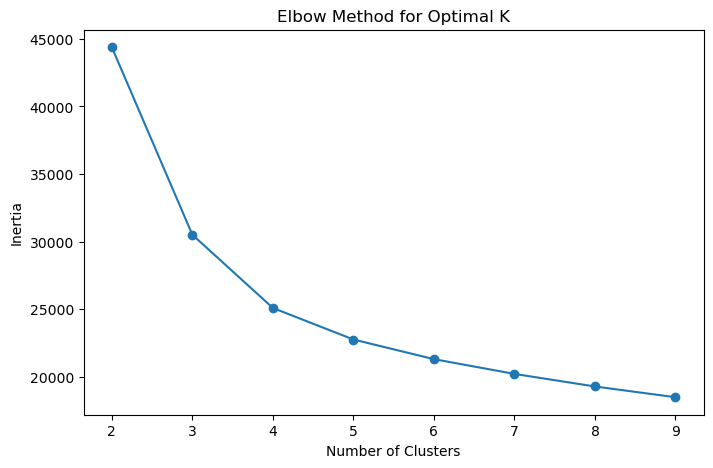

In [54]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [55]:
# Choose K (e.g., 3 based on the elbow method)
k_optimal = 5  # Adjust based on elbow plot
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df = df.assign(cluster=kmeans.fit_predict(df_scaled))


Silhouette Score for K-Means with 5 clusters: 0.2787


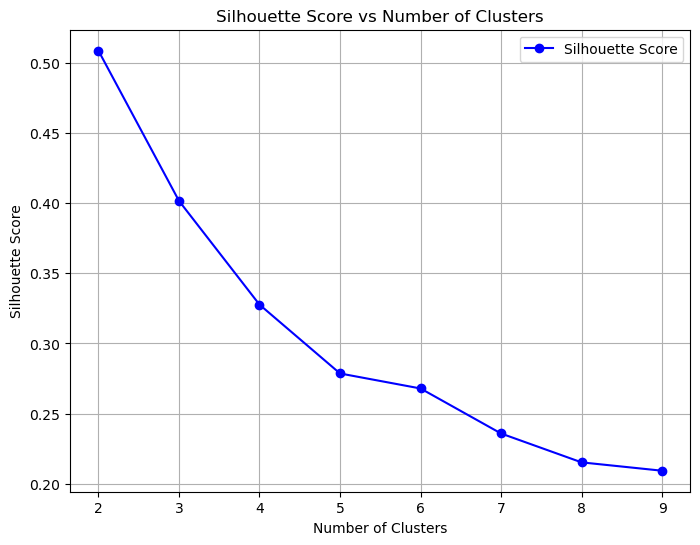

In [56]:

# Silhouette score to measure clustering performance
sil_score = silhouette_score(df_scaled, df['cluster'])
print(f'Silhouette Score for K-Means with {k_optimal} clusters: {sil_score:.4f}')

# Plot silhouette scores for different K values
plt.figure(figsize=(8, 6))
plt.plot(k_values, sil_scores, 'bo-', label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.legend()
plt.show()

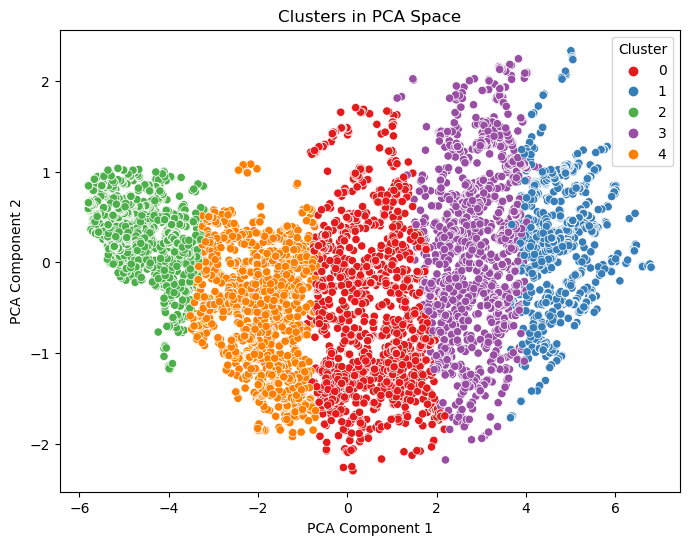

In [57]:
# Visualization of clusters in PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['pca_1'], y=df['pca_2'], hue=df['cluster'], palette='Set1')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters in PCA Space')
plt.legend(title='Cluster')
plt.show()

In [58]:
# Compare clusters with pred_status
ct = pd.crosstab(df['pred_status'], df['cluster'])
print("\nContingency Table:\n")
print(ct)



Contingency Table:

cluster         0     1     2     3    4
pred_status                             
1.0            81    16  1971    16  752
2.0          1028   148    28   685  816
3.0           369  1174     0  1096    2


In [59]:
# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=k_optimal)
df = df.assign(hierarchical_cluster=hierarchical.fit_predict(df_scaled))

In [60]:
# Compare hierarchical clusters with pred_status
ct_hierarchical = pd.crosstab(df['pred_status'], df['hierarchical_cluster'])
print("\nHierarchical Clustering Contingency Table:\n")
print(ct_hierarchical)



Hierarchical Clustering Contingency Table:

hierarchical_cluster     0     1     2    3    4
pred_status                                     
1.0                   2278    20    78  456    4
2.0                    108   239  1107  835  416
3.0                      1  1263   632   19  726


In [92]:
# t-SNE for dimensionality reduction and visualization
ra = np.random.randint(30000)
tsne = TSNE(n_components=2, perplexity=100, n_iter=1000, random_state=ra)
tsne_result = tsne.fit_transform(df_scaled)
df = df.assign(tsne_1=tsne_result[:, 0], tsne_2=tsne_result[:, 1])

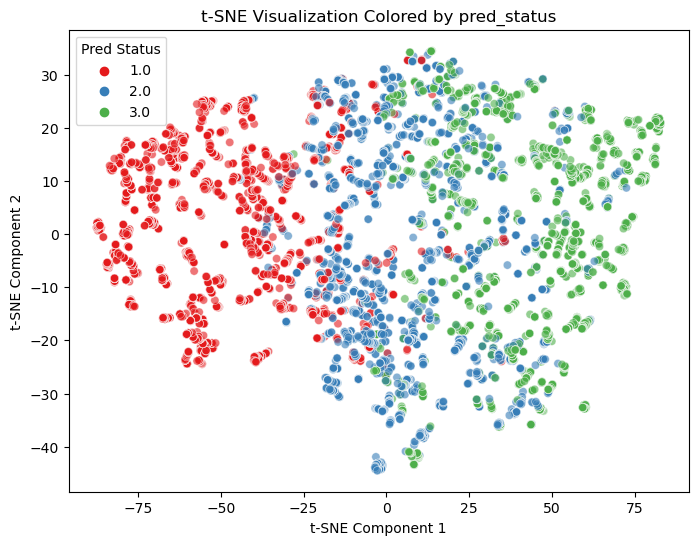

In [93]:
# Plot t-SNE visualization before clustering, colored by pred_status
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['tsne_1'], y=df['tsne_2'], hue=df['pred_status'], palette='Set1', alpha=0.6)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization Colored by pred_status')
plt.legend(title='Pred Status')
plt.show()


In [94]:
# Compute pairwise Euclidean distances in t-SNE space
tsne_distances = squareform(pdist(tsne_result, metric='euclidean'))
tsne_mean_distance = np.mean(tsne_distances)
print(f'Average pairwise Euclidean distance in t-SNE space: {tsne_mean_distance:.4f}')

Average pairwise Euclidean distance in t-SNE space: 58.8271


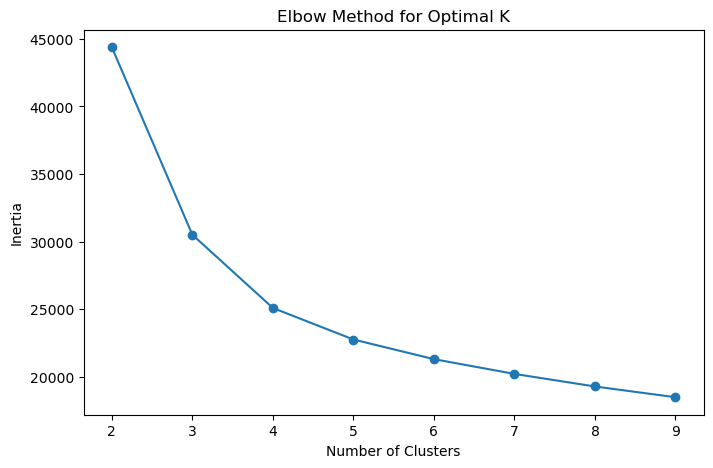

In [95]:
# Elbow method to determine optimal clusters
inertia = []
sil_scores = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(df_scaled, labels))

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [96]:
# Choose K (e.g., 3 based on the elbow method)
k_optimal = 3  # Adjust based on elbow plot
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df = df.assign(cluster=kmeans.fit_predict(df_scaled))


Silhouette Score for K-Means with 3 clusters: 0.4016


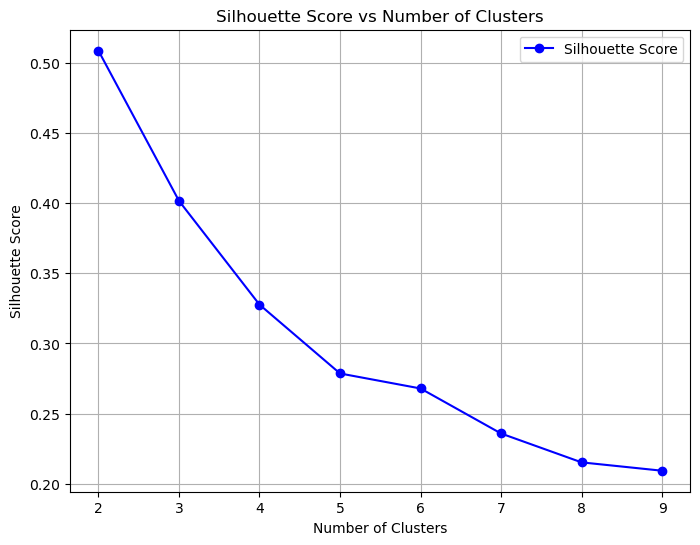

In [97]:
# Silhouette score to measure clustering performance
sil_score = silhouette_score(df_scaled, df['cluster'])
print(f'Silhouette Score for K-Means with {k_optimal} clusters: {sil_score:.4f}')

# Plot silhouette scores for different K values
plt.figure(figsize=(8, 6))
plt.plot(k_values, sil_scores, 'bo-', label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.legend()
plt.show()

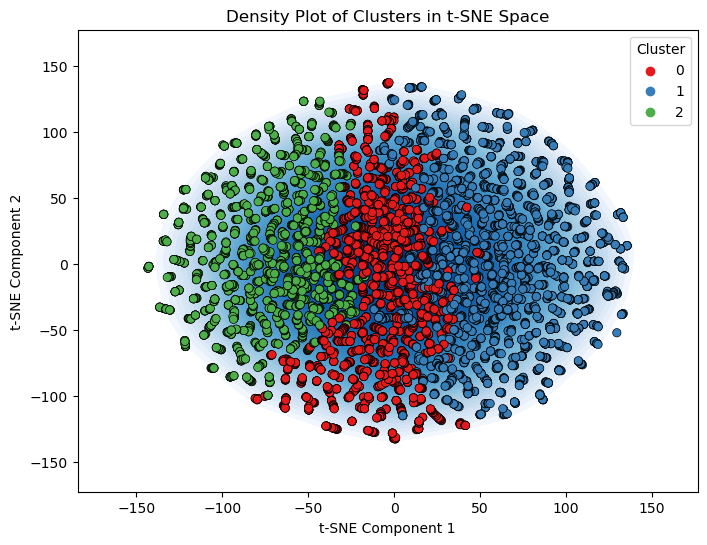

In [66]:
# Visualization of clusters in t-SNE space with density plot
plt.figure(figsize=(8, 6))
sns.kdeplot(x=df['tsne_1'], y=df['tsne_2'], fill=True, cmap='Blues', levels=50)
sns.scatterplot(x=df['tsne_1'], y=df['tsne_2'], hue=df['cluster'], palette='Set1', edgecolor='black')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Density Plot of Clusters in t-SNE Space')
plt.legend(title='Cluster')
plt.show()


In [67]:
# Compare clusters with pred_status
ct = pd.crosstab(df['pred_status'], df['cluster'])
print("\nContingency Table:\n")
print(ct)

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=k_optimal)
df = df.assign(hierarchical_cluster=hierarchical.fit_predict(df_scaled))

# Compare hierarchical clusters with pred_status
ct_hierarchical = pd.crosstab(df['pred_status'], df['hierarchical_cluster'])
print("\nHierarchical Clustering Contingency Table:\n")
print(ct_hierarchical)



Contingency Table:

cluster         0     1     2
pred_status                  
1.0           544    32  2260
2.0          1731   865   109
3.0           312  2329     0

Hierarchical Clustering Contingency Table:

hierarchical_cluster     0     1     2
pred_status                           
1.0                    534  2278    24
2.0                   1942   108   655
3.0                    651     1  1989


In [99]:
# Compute pairwise Euclidean distances in PCA and t-SNE space
pca_distances = squareform(pdist(df[['pca_1', 'pca_2']], metric='euclidean'))
tsne_distances = squareform(pdist(df[['tsne_1', 'tsne_2']], metric='euclidean'))

pca_mean_distance = np.mean(pca_distances)
tsne_mean_distance = np.mean(tsne_distances)
print(f'Average pairwise Euclidean distance in PCA space: {pca_mean_distance:.4f}')
print(f'Average pairwise Euclidean distance in t-SNE space: {tsne_mean_distance:.4f}')

Average pairwise Euclidean distance in PCA space: 4.2872
Average pairwise Euclidean distance in t-SNE space: 58.8271
